In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('/content/mbti_1.csv')

In [ ]:
df['type_code'] = df['type'].astype('category').cat.codes

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['posts'], df['type_code'], test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('lr', LogisticRegression(max_iter=1000, C=1.0, penalty='l2'))  # C is the inverse of regularization strength
])


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('lr', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.05      0.09        41
           1       0.73      0.58      0.65       125
           2       0.77      0.23      0.35        44
           3       0.68      0.53      0.59       135
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       1.00      0.07      0.12        15
           8       0.62      0.66      0.64       288
           9       0.55      0.88      0.68       370
          10       0.60      0.69      0.64       193
          11       0.66      0.80      0.72       293
          12       1.00      0.13      0.24        45
          13       0.57      0.08      0.13        53
          14       0.80      0.09      0.16        44
          15       0.79      0.33      0.46        67

    accuracy                           0.62      1735
   macro avg       0.57   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print(f'Training Score: {train_score}')
print(f'Testing Score: {test_score}')

Training Score: 0.7167146974063401
Testing Score: 0.6190201729106628


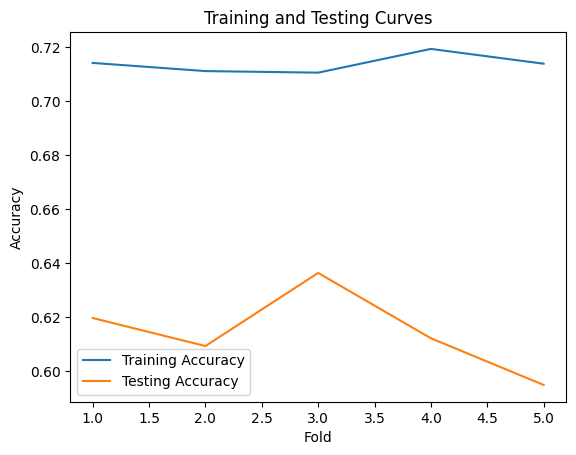

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load and prepare the dataset
df = pd.read_csv('/content/mbti_1.csv')  # Load the dataset
df['type_code'] = df['type'].astype('category').cat.codes  # Create a coded target column

# Splitting the dataset into features (X) and target (y)
X = df['posts']  # Feature column
y = df['type_code']  # Target column

# Initialize the model
model = LogisticRegression(max_iter=1000, C=1.0, penalty='l2')

# K-Fold Cross Validation
kf = KFold(n_splits=5)  # Adjust the number of splits as needed
training_scores = []
testing_scores = []

for train_index, test_index in kf.split(X):
    # Splitting the data into training and testing sets for each fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Feature extraction
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model
    train_score = accuracy_score(y_train, model.predict(X_train))
    test_score = accuracy_score(y_test, model.predict(X_test))

    # Store scores
    training_scores.append(train_score)
    testing_scores.append(test_score)

# Plotting the training and testing curves
plt.plot(range(1, 6), training_scores, label='Training Accuracy')
plt.plot(range(1, 6), testing_scores, label='Testing Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training and Testing Curves')
plt.legend()
plt.show()

In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


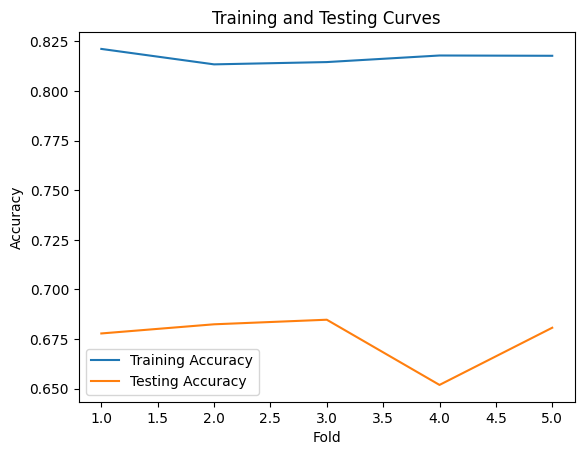

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# Load and prepare the dataset
df = pd.read_csv('/content/mbti_1.csv')  # Update the path to your dataset
df['type_code'] = df['type'].astype('category').cat.codes

# Splitting the dataset into features (X) and target (y)
X = df['posts']
y = df['type_code']

# K-Fold Cross Validation
kf = KFold(n_splits=5)
training_scores = []
testing_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Feature extraction
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_transformed = vectorizer.fit_transform(X_train)
    X_test_transformed = vectorizer.transform(X_test)

    # Feature selection
    selector = SelectKBest(chi2, k=3000)
    X_train_selected = selector.fit_transform(X_train_transformed, y_train)
    X_test_selected = selector.transform(X_test_transformed)

    # Initialize CatBoostClassifier
    model = CatBoostClassifier(loss_function='MultiClass',eval_metric='MultiClass',task_type='GPU',verbose=False)  # `verbose=0` to prevent a lot of output

    # Train the model
    model.fit(X_train_selected, y_train)

    # Evaluate the model
    train_score = accuracy_score(y_train, model.predict(X_train_selected))
    test_score = accuracy_score(y_test, model.predict(X_test_selected))

    training_scores.append(train_score)
    testing_scores.append(test_score)

# Plotting the training and testing curves
plt.plot(range(1, kf.get_n_splits() + 1), training_scores, label='Training Accuracy')
plt.plot(range(1, kf.get_n_splits() + 1), testing_scores, label='Testing Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training and Testing Curves')
plt.legend()
plt.show()
